# Data Set

In [1]:
%matplotlib inline  
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
data_dir = os.path.join('Dataset_Daun')

# Data Processing

In [16]:
NR_OF_IMAGES = 57 
BATCH_SIZE = 128
STEPS_PER_EPOCH = int(NR_OF_IMAGES/BATCH_SIZE)
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
data_gen = ImageDataGenerator(rescale=1./255)

In [19]:
data_generator = data_gen.flow_from_directory(data_dir, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT), batch_size=BATCH_SIZE, class_mode="categorical")

Found 57 images belonging to 6 classes.


In [20]:
for data_batch, labels_batch in data_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print('data example shape:', data_batch[0].shape)
    print('label shape:', labels_batch[0].shape)
    break

data batch shape: (57, 64, 64, 3)
labels batch shape: (57, 6)
data example shape: (64, 64, 3)
label shape: (6,)


The one_hot_encoded label of the plotted image is [1. 0. 0. 0. 0. 0.]


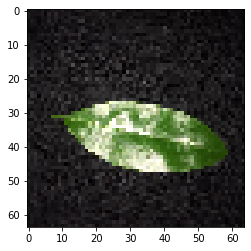

In [21]:
for data_batch, labels_batch in data_generator:
    plt.imshow(data_batch[0])
    print('The one_hot_encoded label of the plotted image is {}'.format(labels_batch[0]))
    break

# Convolutional Neural Networks

In [22]:
from keras import models
from keras import layers

In [23]:
network = models.Sequential()
network.add(layers.Conv2D(16,(3,3), activation='relu', input_shape=(64,64,3)))
network.add(layers.MaxPool2D(2,2))
network.add(layers.Conv2D(32,(3,3), activation='relu'))
network.add(layers.MaxPool2D(2,2))
network.add(layers.Conv2D(64,(3,3), activation='relu'))
network.add(layers.MaxPool2D(2,2))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(3, activation='softmax'))

In [24]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

In [25]:
network.compile(optimizer= 'RMSprop', loss= 'categorical_crossentropy',  metrics=['accuracy'])

### Material

In [26]:
class_0_path = os.path.join( data_dir,'Sirsak')
class_1_path = os.path.join( data_dir,'Jinten')
class_2_path = os.path.join( data_dir,'Jeruk')
class_3_path = os.path.join( data_dir,'Melati')
class_4_path = os.path.join( data_dir,'Sirih Merah')
class_5_path = os.path.join( data_dir,'Sri Rejeki Putih')

In [27]:
class_0_names = os.listdir(class_0_path)
print(class_0_names[:3])
class_1_names = os.listdir(class_1_path)
print(class_1_names[:3])
class_2_names = os.listdir(class_2_path)
print(class_2_names[:3])
class_3_names = os.listdir(class_3_path)
print(class_3_names[:3])
class_4_names = os.listdir(class_4_path)
print(class_4_names[:3])
class_5_names = os.listdir(class_5_path)
print(class_5_names[:3])

['38.jpeg', '39.jpeg', '40.jpeg']
['11.jpeg', '12.jpeg', '13.jpeg']
['1.jpeg', '10.jpeg', '2.jpeg']
['21.jpeg', '22.jpeg', '23.jpeg']
['31.jpeg', '32.jpeg', '33.jpeg']
['48.jpeg', '49.jpeg', '50.jpeg']


In [28]:
print('total training  images class 0:', len(os.listdir(class_0_path)))
print('total training  images class 1:', len(os.listdir(class_1_path)))
print('total training  images class 2:', len(os.listdir(class_2_path)))
print('total training  images class 3:', len(os.listdir(class_3_path)))
print('total training  images class 4:', len(os.listdir(class_4_path)))
print('total training  images class 5:', len(os.listdir(class_5_path)))

total training  images class 0: 10
total training  images class 1: 10
total training  images class 2: 10
total training  images class 3: 10
total training  images class 4: 7
total training  images class 5: 10


In [52]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 6
ncols = 4

pic_index = 0

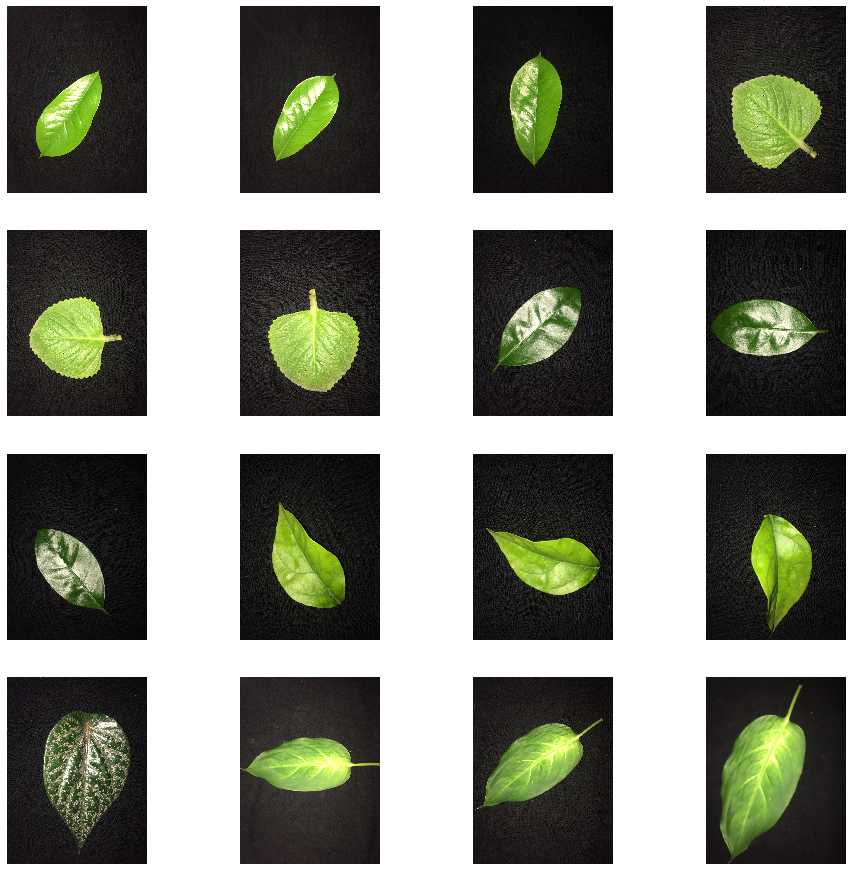

In [54]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 3
next_0_pix = [os.path.join(class_0_path, fname) 
                for fname in class_0_names[pic_index-3:pic_index]]
next_1_pix = [os.path.join(class_1_path, fname) 
                for fname in class_1_names[pic_index-3:pic_index]]
next_2_pix = [os.path.join(class_2_path, fname) 
                for fname in class_2_names[pic_index-3:pic_index]]
next_3_pix = [os.path.join(class_3_path, fname) 
                for fname in class_3_names[pic_index-3:pic_index]]
next_4_pix = [os.path.join(class_4_path, fname) 
                for fname in class_4_names[pic_index-3:pic_index]]
next_5_pix = [os.path.join(class_5_path, fname) 
                for fname in class_5_names[pic_index-3:pic_index]]

for i, img_path in enumerate(next_0_pix+next_1_pix+next_2_pix+next_3_pix+next_4_pix+next_5_pix):
  # indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
